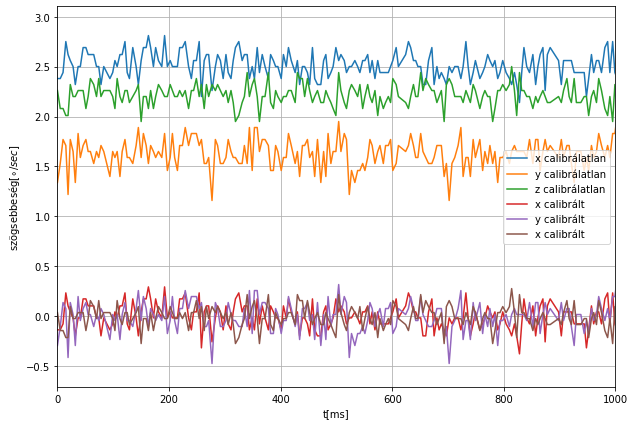

[[2.51468212 1.63125828 2.22166887]]


In [2]:
#gyroscope calibration
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

data=np.loadtxt("nyugalom.txt")
data_g=data[:,3:6]
t=data[:,9]
t=t-t[0]
plt.figure(figsize=(10,7))
plt.plot(t,data_g[:,0],label="x calibrálatlan")
plt.plot(t,data_g[:,1],label="y calibrálatlan")
plt.plot(t,data_g[:,2],label="z calibrálatlan")

offset=np.array([data_g.mean(axis=0)])
data_g-=offset

plt.plot(t,data_g[:,0],label="x calibrált")
plt.plot(t,data_g[:,1],label="y calibrált")
plt.plot(t,data_g[:,2],label="x calibrált")
plt.xlim(0,1000)
plt.xlabel("t[ms]")
plt.ylabel("szögsebbeség[${\circ}/sec$]")
plt.grid()
plt.legend()
plt.show()
print(offset)

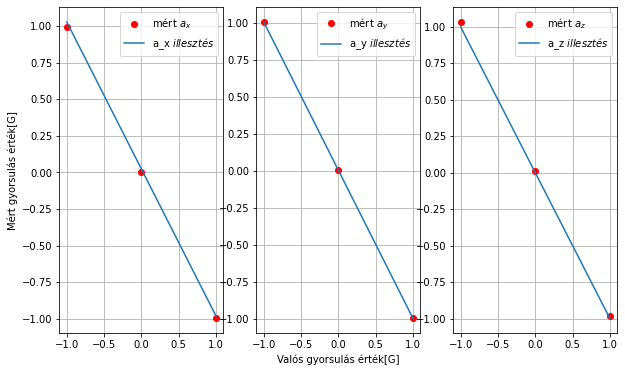

[-0.998  0.001] [0.00173205 0.00141421]
[-1.0015      0.00766667] [0.00202073 0.00164992]
[-1.005  0.024] [0.0069282  0.00565685]


In [7]:
#gyorsulas szenzor kalibralas

a_data=np.loadtxt("accelo_calibration_z.txt")[:,:3]
z=np.array([np.mean(a_data[0:10,2]),np.mean(a_data[10:20,2]),np.mean(a_data[20:30,2])])
y=np.array([np.mean(a_data[30:40,1]),np.mean(a_data[40:50,1]),np.mean(a_data[50:60,1])])
x=np.array([np.mean(a_data[60:70,0]),np.mean(a_data[70:80,0]),np.mean(a_data[80:90,0])])
g=np.array([-1,0,1])


def f(x,a,b):
    return x*a + b

popt=np.zeros([3,2])
popt[2,:],pcovz=curve_fit(f,g,z) 
popt[1,:],pcovy=curve_fit(f,g,y)
popt[0,:],pcovx=curve_fit(f,g,x) 

plt.figure(figsize=(10,6))

plt.subplot(1, 3, 1)
plt.plot(g,x,linestyle="",marker="o",color="r",label="mért $a_x$")
plt.plot(g,popt[2,0]*g+popt[2,1],label="a_x $illesztés$")

plt.ylabel("Mért gyorsulás érték[G]")
plt.grid()
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(g,y,linestyle="",marker="o",color="r",label="mért $a_y$")
plt.plot(g,popt[1,0]*g+popt[1,1],label="a_y $illesztés$")
plt.xlabel("Valós gyorsulás érték[G]")
plt.grid()
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(g,z,linestyle="",marker="o",color="r",label="mért $a_z$")
plt.plot(g,popt[0,0]*g+popt[0,1],label="a_z $illesztés$")
plt.grid()
plt.legend()
plt.show()

perrx = np.sqrt(np.diag(pcovx))
perry = np.sqrt(np.diag(pcovy))
perrz = np.sqrt(np.diag(pcovz))
print(popt[0,:],perrx)
print(popt[1,:],perry)
print(popt[2,:],perrz)

In [12]:
data = np.loadtxt("magnetocalibration.txt")[:,6:9]
data=np.savetxt("magneto.txt",data)

In [13]:
#magneto
hardiron=np.array( [  30.301916, 25.042095,-113.504275])
softiron=np.array(  [[1.110844,-0.018576, -0.054831],
    [-0.018576, 0.904965, -0.222311],
    [-0.054831 ,-0.222311,  0.616734]])

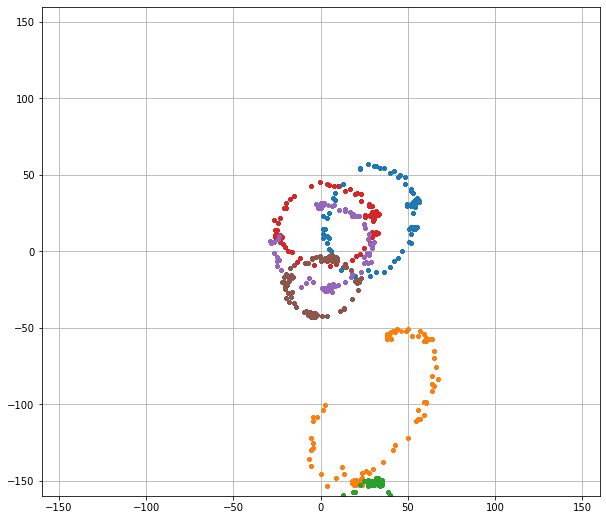

In [14]:
#magnetometer kalibralas
def calib(data):
    data[0:3]=(data[0:3]*abs(popt[:,0])-popt[:,1])*9.807813
    data[3:6]=data[3:6]-offset
    data[6:9]=np.matmul(softiron,(data[6:9]-hardiron))
    return data


data_mz=np.loadtxt("magz.txt")
data_mx=np.loadtxt("magy.txt")
data_my=np.loadtxt("magx.txt")

plt.figure(figsize=(10,9))
plt.plot(data_mz[:,6],data_mz[:,7],linestyle = " ",marker=".")
plt.plot(data_mx[:,7],data_mx[:,8],linestyle = " ",marker=".")
plt.plot(data_my[:,6],data_my[:,8],linestyle = " ",marker=".")
for i in range(len(data_mx[:,0])):
    data_mx[i,:]=calib(data_mx[i,:])
for i in range(len(data_my[:,0])):
    data_my[i,:]=calib(data_my[i,:])
for i in range(len(data_mz[:,0])):
    data_mz[i,:]=calib(data_mz[i,:])

plt.plot(data_mz[:,6],data_mz[:,7],linestyle = " ",marker=".")
plt.plot(data_mx[:,7],data_mx[:,8],linestyle = " ",marker=".")
plt.plot(data_my[:,6],data_my[:,8],linestyle = " ",marker=".")
plt.xlim(-160,160)
plt.ylim(-160,160)
plt.grid(True)



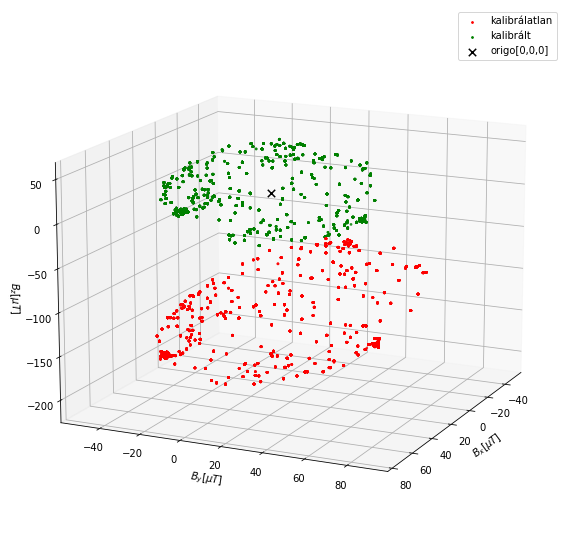

In [15]:

data_m=np.loadtxt("magnetocalibration.txt")



def calib(data):
    data[0:3]=(data[0:3]*abs(popt[:,0])-popt[:,1])#*9.807813
    data[3:6]=data[3:6]-offset
    data[6:9]=np.matmul(softiron,(data[6:9]-hardiron))
    return data



ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
ax.view_init(15, 25)
ax.scatter(data_m[:,6],data_m[:,7],data_m[:,8],color="r",s=3,label="kalibrálatlan")
for i in range(len(data_m[:,9])):
    data_m[i,:]=calib(data_m[i,:])

ax.scatter(data_m[:,6],data_m[:,7],data_m[:,8],color="g",s=3,label="kalibrált")

ax.scatter(0,0,0,marker="x",color='black',s=55,label="origo[0,0,0]")
#ax.plot([0,100],[0,0],[0,0])
#ax.plot([0,0],[0,100],[0,0])
#ax.plot([0,0],[0,0],[0,100])
ax.set_xlabel('$B_x[\mu T]$')
ax.set_ylabel('$B_y[\mu T]$')
ax.set_zlabel('$B_z[\mu T]$')
plt.legend()
plt.show()

In [1]:
data_a=np.loadtxt("nyugalom.txt")
t=data_a[:,9]
t-=t[0]
plt.figure(figsize=(10,7))
plt.plot(t,data_a[:,0],label="x calibrálatlan")
plt.plot(t,data_a[:,1],label="y calibrálatlan")
plt.plot(t,data_a[:,2],label="z calibrálatlan")
for i in range(len(t)):
    data_a[i,:]=calib(data_a[i,:])

plt.plot(t,data_a[:,0],label="x calibrált")
plt.plot(t,data_a[:,1],label="y calibrált")
plt.plot(t,data_a[:,2],label="x calibrált")
plt.xlim(0,1000)
plt.xlabel("t[ms]")
plt.ylabel("gyorsulás[G]")
plt.grid()
plt.legend()
plt.show()

NameError: name 'np' is not defined

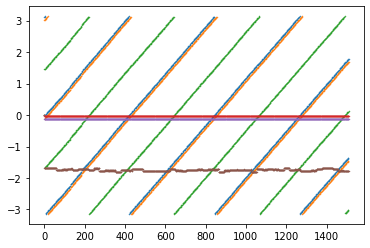

In [2]:
#kalman szuro
import numpy as np
import matplotlib.pyplot as plt

data=np.loadtxt("nyugalom.txt")

offset=np.array([[2.51468212, 1.63125828, 2.22166887]])#gyroscope offset

popt=np.array([[-9.98000000e-01,  9.99999998e-04],#accelometer calibration
       [-1.00150000e+00,  7.66666673e-03],
       [-1.00500000e+00,  2.40000000e-02]])

#magneto
hardiron=np.array( [  30.301916, 25.042095,-113.504275])
softiron=np.array(  [[1.110844,-0.018576, -0.054831],
    [-0.018576, 0.904965, -0.222311],
    [-0.054831 ,-0.222311,  0.616734]])


def calib(data):
    data[0:3]=(data[0:3]*abs(popt[:,0])-popt[:,1])*9.807813
    data[3:6]=np.radians((data[3:6]-offset))
    data[6:9]=np.matmul(softiron,(data[6:9]-hardiron))
    data[6:9]=data[7],data[6],-data[8]
    data[9]=data[9]/1000
    return data


for i in range(len(data[:,9])):
    data[i,:]=calib(data[i,:])

def angle(data_a,data_m):
     
      a=data_a
     
      m=data_m
      
      roll = np.arctan2(a[1], a[2] + 0.05*a[0])
      pitch = np.arctan2(-1*a[0], np.sqrt(np.square(a[1]) + np.square(a[2]) ))
     

      m = m/(m[0]**2+m[1]**2+m[2]**2)**0.5
      yaw = np.arctan2(np.sin(roll)*m[2] - np.cos(roll)*m[1],\
            np.cos(pitch)*m[0] + np.sin(roll)*np.sin(pitch)*m[1] \
            + np.cos(roll)*np.sin(pitch)*m[2])
      #roll = np.degrees(roll)
      #pitch = np.degrees(pitch)
      #yaw = np.degrees(yaw)

      return [roll,pitch,yaw]



A=np.zeros([6,6])
B=np.zeros([6,3])
np.fill_diagonal(A,1)
Q_var=np.std(data[:,3:6],axis=0) #process noise matrix
Q=np.zeros([6,6])
np.fill_diagonal(Q,Q_var)

def process(u,mean,cov,Q,dt):

    
    A[[0,1,2],[3,4,5]]=-dt
    
    B[[0,1,2],[0,1,2]]=dt
    mean_est=(np.matmul(A,mean)+np.matmul(B,u))#system state estimate
    mean_est=mean_est%(2*np.pi)-np.pi
    cov_est=np.matmul(A,np.matmul(cov,A))+1*Q #covariance matrix
    
    return mean_est,cov_est

C=np.zeros([3,6])

def Measurment(state0,z,mean_est,cov_est,R):

    C[[0,1,2],[0,1,2]]=1
    S=np.linalg.inv(np.matmul(C,np.matmul(cov_est,np.transpose(C)))+R)
   
    Kg=np.matmul(cov_est,np.matmul(np.transpose(C),S))
   
    
    state=state0+np.matmul(Kg,(z-np.matmul(C,mean_est)))
    
    cov=np.matmul(np.identity(6)-np.matmul(Kg,C),cov_est)

    
    
    return state,cov


state=np.array([*angle(data[0,:3],data[0,6:9]),0,0,0])


cov=Q
R=np.zeros([3,3])
R[[0,1,2],[0,1,2]]=np.std(data[:,6:9],axis=0)
res=np.zeros([len(data[:,0]),6])
res2=np.zeros([len(data[:,0]),6])
for i in range(1,len(data[:,9])):
    uk=data[i,3:6]
    dt=(data[i,9]-data[i-1,9])
    
    state,cov=process(uk,state,cov,Q,dt)
    res[i,:]=state
    ang=angle(data[i,:3],data[i,6:9])
    
    #state,cov=Measurment(res2[i-1,:],ang,state,cov,R)
    res2[i,:3]=ang
    
   
plt.plot(res[:,0],marker=".",linestyle="",markersize=1)

plt.plot(res[:,1],marker=".",linestyle="",markersize=1)
plt.plot(res[:,2],marker=".",linestyle="",markersize=1)


plt.plot(res2[:,0],marker=".",linestyle="",markersize=1)

plt.plot(res2[:,1],marker=".",linestyle="",markersize=1)
plt.plot(res2[:,2],marker=".",linestyle="",markersize=1)


kezedeti szogek: -0.0708021901334246 -0.02826062414117262 1.792380884048884


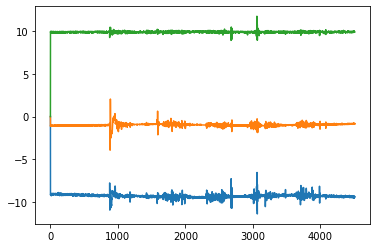

In [72]:
import numpy as np
import matplotlib.pyplot as plt
data=np.loadtxt("ferdeszog.txt")

def calib(data):
    data[0:3]=(data[0:3]*abs(popt[:,0])-popt[:,1])*9.807813
    data[3:6]=np.radians((data[3:6]-offset))
    data[6:9]=np.matmul(softiron,(data[6:9]-hardiron))
    data[6:9]=data[7],data[6],-data[8]
    data[9]=data[9]/1000
    return data





for i in range(len(data[:,9])):
    data[i,:]=calib(data[i,:])



# kindulási szög számolása
gyro=data[1,3:6]
mag=data[1,6:9]/np.linalg.norm(data[1,6:9])
accel=data[1,:3]/np.linalg.norm(data[1,:3])
 
roll=-np.arctan2(accel[1],(accel[0]**2+accel[2]**2)**0.5)
pitch=-np.arctan2(accel[0],(accel[1]**2+accel[2]**2)**0.5)
   
down=accel
east=np.cross(down,mag)
east/=np.linalg.norm(east)
north=np.cross(east,down)
north/=np.linalg.norm(north)
yaw=np.mean(np.arctan2(north[1],north[0]))

print("kezedeti szogek:",roll,pitch,yaw)

#roll=-0.18662013
#pitch=0.27076097 
#yaw=-0.06372075
orientation=np.zeros([9,len(data[:,9])])
#a_ref=np.array([0,0,0])

x=np.array([0,0,0])
v=np.array([0,0,0])

Rb=np.array([[np.cos(pitch)*np.cos(yaw),np.cos(roll)*np.sin(pitch)*np.cos(yaw)-np.cos(roll)*np.sin(yaw),np.cos(roll)*np.sin(pitch)*np.cos(yaw)+np.sin(roll)*np.sin(yaw)],
             [np.cos(pitch)*np.sin(yaw), np.sin(roll)*np.sin(pitch)*np.sin(yaw)+np.cos(pitch)*np.cos(yaw),np.cos(roll)*np.sin(pitch)*np.sin(yaw)-np.sin(roll)*np.cos(yaw)],
             [-np.sin(yaw),np.sin(roll)*np.cos(pitch),np.cos(roll)*np.cos(roll)]])

g=np.array([0,0,9.81])
for i in range(1,len(data[:,0])):
    dt=data[i,9]-data[i-1,9]
    w=data[i,3:6]
    f=data[i,:3]
    
    omeg=np.array([[0,-w[2],w[1]],
                   [w[2],0,-w[0]],
                   [-w[1],w[0],0]])
    a_ref=np.dot(f,Rb)#-g
    v=v+(a_ref)*dt
    x=x+v*dt
    Rb+=np.dot(omeg,Rb)*dt
    orientation[:,i]=np.array([x,v,a_ref]).flatten()
    #print(x)
    #print(a_ref)
plt.plot(orientation[6])
plt.plot(orientation[7])
plt.plot(orientation[8])
#plt.xlim(0,1500)
#plt.ylim(-10,15)

[-0.19697636 -0.14448068 -0.02789234]


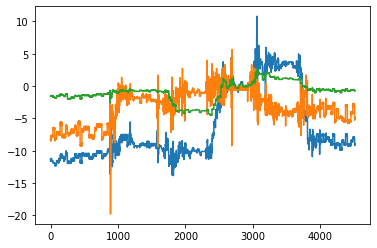

In [73]:
from ahrs.filters import FAMC
mag_data=data[:,6:9]
acc_data=data[:,:3]
famc = FAMC(acc=acc_data, mag=mag_data)
famc.Q 
import numpy as np

def quaternion_to_euler_angle_vectorized1(w, x, y, z):
    ysqr = y * y

    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + ysqr)
    X = np.degrees(np.arctan2(t0, t1))

    t2 = +2.0 * (w * y - z * x)
    t2 = np.where(t2>+1.0,+1.0,t2)
    t2 = +1.0 if t2 > +1.0 else t2

    t2 = np.where(t2<-1.0, -1.0, t2)
    t2 = -1.0 if t2 < -1.0 else t2
    Y = np.degrees(np.arcsin(t2))

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (ysqr + z * z)
    Z = np.degrees(np.arctan2(t3, t4))

    return X, Y, Z 
stat=np.zeros([3,len(data[:,0])])
for i in range(len(data[:,0])):
    stat[:,i]=quaternion_to_euler_angle_vectorized1(*famc.Q[i,:])
plt.plot(stat[0,:])
plt.plot(stat[1,:])
plt.plot(stat[2,:])
print(np.deg2rad(stat[:,0]))

In [93]:
import numpy as np
from ahrs.filters import EKF
from ahrs.common.orientation import acc2q
data=np.loadtxt("ferdeszog.txt")
for i in range(len(data[:,9])):
    data[i,:]=calib(data[i,:])

gyr_data=data[:,3:6]
acc_data=data[:,:3]
mag_data=data[:,6:9]
ekf = EKF(gyr=gyr_data, acc=acc_data, mag=mag_data)
stat=np.zeros([3,len(data[:,0])])

for i in range(len(data[:,0])):
    stat[:,i]=quaternion_to_euler_angle_vectorized1(*ekf.Q[i,:])

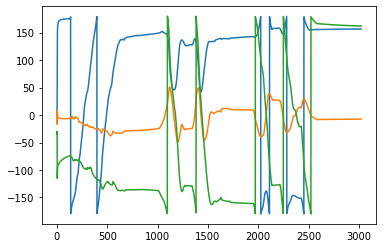

In [94]:
plt.plot(stat[0,:])
plt.plot(stat[1,:])
plt.plot(stat[2,:])